# Pytorch

## basic

### Tensors

In [1]:
from __future__ import print_function
import torch

In [6]:
x = torch.empty(5, 3)
print(x)

tensor([[-1.8882e-29,  3.0801e-41,  5.0447e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 1.3788e-14,  3.6423e-06,  2.0699e-19],
        [ 3.3738e-12,  7.4086e+28,  6.9397e+22],
        [ 1.7260e+25,  2.2856e+20,  5.0948e-14]])


In [7]:
x =torch.rand(5, 3)
print(x)

tensor([[0.3809, 0.9270, 0.9140],
        [0.9029, 0.3442, 0.0564],
        [0.6236, 0.8208, 0.2178],
        [0.1682, 0.2741, 0.4104],
        [0.6452, 0.3909, 0.5285]])


In [8]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [10]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [14]:
x = x.new_ones(5, 3, dtype=torch.double)   # new_* methods take in sizes
print(x)
print('-------------------------------------------------')

x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)

print(x.size()) # getsize

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
-------------------------
tensor([[-0.5059, -0.9057,  1.1698],
        [ 1.4891,  0.9715,  0.1597],
        [ 0.7834,  0.7476, -0.0135],
        [-1.3493,  0.8096, -0.0139],
        [ 0.1034, -0.3083, -0.5273]])
torch.Size([5, 3])


### Operations

Any operation that mutates a tensor in-place is post-fixed with an _. For example: `x.copy_(y), x.t_()`, will change x.

In [18]:
y = torch.rand(5, 3)
print(x + y)
print('-------------------------------------------------')

print(torch.add(x, y))
print('-------------------------------------------------')

result = torch.empty_like(x)
torch.add(x, y, out=result)
print(result)

print('-------------------------------------------------')
y.add_(x)
print(y)

tensor([[ 0.3859, -0.6464,  1.7737],
        [ 2.1816,  1.3875,  0.4016],
        [ 0.8185,  0.9907,  0.8553],
        [-0.8256,  0.9758,  0.9095],
        [ 1.0654,  0.6660, -0.4235]])
-------------------------------------------------
tensor([[ 0.3859, -0.6464,  1.7737],
        [ 2.1816,  1.3875,  0.4016],
        [ 0.8185,  0.9907,  0.8553],
        [-0.8256,  0.9758,  0.9095],
        [ 1.0654,  0.6660, -0.4235]])
-------------------------------------------------
tensor([[ 0.3859, -0.6464,  1.7737],
        [ 2.1816,  1.3875,  0.4016],
        [ 0.8185,  0.9907,  0.8553],
        [-0.8256,  0.9758,  0.9095],
        [ 1.0654,  0.6660, -0.4235]])
-------------------------------------------------
tensor([[ 0.3859, -0.6464,  1.7737],
        [ 2.1816,  1.3875,  0.4016],
        [ 0.8185,  0.9907,  0.8553],
        [-0.8256,  0.9758,  0.9095],
        [ 1.0654,  0.6660, -0.4235]])


In [20]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use `.item()` to get the value as a Python number

In [21]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.3159])
0.31590744853019714


### NumPy Bridge 
The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

In [27]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [28]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [30]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [31]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors

In [32]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + Y
    print(z)
    print(z.to("cpu", torch.double))

## Autograd

### Tensor
torch.Tensor is the central class of the package. If you set its attribute `.requires_grad` as `True`, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

In [46]:
import torch

x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [47]:
y = x + 2
print(y)
print('-------------------------------------------------')

print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)
-------------------------------------------------


In [48]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


`.requires_grad_( ... )` changes an existing Tensor’s `requires_grad` flag in-place. The input flag defaults to `False` if not given.

In [49]:
a =torch.randn(2, 2)
a = ((a* 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients 

In [50]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [51]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y =  y *2
    
print(y)

tensor([ 788.7339, -607.5063, -494.8064], grad_fn=<MulBackward>)


In [52]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v) # vector-Jacobian product

print(x.grad)

tensor([ 102.4000, 1024.0000,    0.1024])


In [53]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)
    


True
True
False


## Neural Network 

### Define the network

![mnist network](https://pytorch.org/tutorials/_images/mnist.png)

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(slef, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [70]:
params = list(net.parameters())
print(len(params))

for i in range(len(params)):
    print(params[i].size())

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [71]:
input = torch.randn(1, 1, 32, 32) # nSamples x nChannels x Height x Width
out = net(input)
print(out)

tensor([[-0.0912,  0.0611, -0.0037, -0.0468, -0.0163, -0.0095,  0.0097, -0.0717,
          0.1212, -0.0903]], grad_fn=<ThAddmmBackward>)


In [72]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### loss

In [73]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3818, grad_fn=<MseLossBackward>)


In [74]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

### backprop

In [75]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)



conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0001, -0.0132, -0.0090,  0.0103, -0.0137, -0.0082])


### Update the weights

In [76]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [78]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  # Does the update

##  Training a classifier

### loading and normalizing data 

In [93]:
import torch
import torchvision
import torchvision.transforms as transforms

In [108]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

traninset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traninset, batch_size=4, 
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


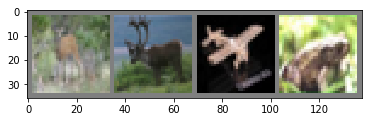

 deer  deer plane  frog


In [109]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5       # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### define network, loss and optimizer 

In [113]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Training

In [115]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.201
[1,  4000] loss: 1.866
[1,  6000] loss: 1.685
[1,  8000] loss: 1.585
[1, 10000] loss: 1.510
[1, 12000] loss: 1.457
[2,  2000] loss: 1.388
[2,  4000] loss: 1.363
[2,  6000] loss: 1.336
[2,  8000] loss: 1.311
[2, 10000] loss: 1.283
[2, 12000] loss: 1.245
Finished Training


### Test the network on the test data

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f04a83bbb38>>
Traceback (most recent call last):
  File "/home/dd/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    #
  File "/home/dd/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    #          must continue to next iteration .
  File "/home/dd/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/dd/.pyenv/versions/3.6.6/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    # storages of mixed types: float, bytes, double... If you make the entire
  File "/home/dd/.pyenv/versions/3.6.6/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  F

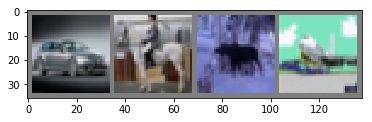

GroundTruth:    car horse  deer plane


In [119]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### analysis

In [122]:
output = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  horse   cat  bird horse


In [123]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on 10000 teat images: %d %%' %(100 * correct / total))

Accuracy of the network on 10000 teat images: 54 %


In [124]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 58 %
Accuracy of  bird : 50 %
Accuracy of   cat : 44 %
Accuracy of  deer : 39 %
Accuracy of   dog : 61 %
Accuracy of  frog : 46 %
Accuracy of horse : 55 %
Accuracy of  ship : 71 %
Accuracy of truck : 69 %


### train on GPU

In [125]:
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [126]:
net.to(device)

inputs, lablels = inputs.to(device), labels.to(device)

## Data parallelism 

Ref. [this](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html#sphx-glr-beginner-blitz-data-parallel-tutorial-py)